# **Importar Librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan

#**Cargar Datos**

In [2]:
# utilizo el comando .read_csv para importar el archivo .csv.

amazon_correl = pd.read_csv(r'/content/amazon_dataset_final.csv')

###**Linear regression analysis**



In [3]:
# Selección de características y variable objetivo
X = amazon_correl[['discounted_price', 'discount_percentage', 'rating', 'rating_count']]
y = amazon_correl['actual_price']

# Verificar las primeras filas de X e y
print("\nVariables Independientes (X):")
display(X.head())

print("Variable Dependiente (y):")
display(y.head())


Variables Independientes (X):


,discounted_price,discount_percentage,rating,rating_count
0,4.79,0.64,4.2,24269.0
1,2.39,0.43,4.0,43994.0
2,2.39,0.90,3.9,7928.0
3,3.95,0.53,4.2,94363.0
4,1.85,0.61,4.2,16905.0


Variable Dependiente (y):


,actual_price
0,13.19
1,4.19
2,22.79
3,8.39
4,4.79


**Features (X) vs Target (Y)**

La variable dependiente es la variable que se predecirá utilizando el modelo (precio con descuento). Las variables independientes son variables que el modelo utilizará para hacer la predicción (precio real)

In [4]:
# Nombrar el dataframe de la variable dependiente como X y el dataframe de la variable independiente como Y.
# Utilizo el comando iloc[] para elegir filas y columnas basadas en valores de índice.
# Utilizo el comando .reshape(-1, 1) para que cada dataframe tenga 1 columna.

X = amazon_correl.iloc[:, 0].values.reshape(-1, 1)
Y = amazon_correl.iloc[:, 1].values.reshape(-1, 1)

**Train - Test split**

Los datos de entrenamiento son una parte (generalmente alrededor del 80%) de los puntos de datos elegidos al azar del conjunto de datos original (X e Y) y los datos de prueba son la parte restante del conjunto de datos. Los datos de entrenamiento se utilizan para crear el modelo de regresión lineal. Una vez que se crea y prueba la precisión del modelo de regresión, se utiliza el mismo modelo, pero con los datos de prueba utilizados como entrada. El modelo se prueba la precisión por segunda vez y las dos mediciones de precisión se comparan entre sí. Ambas pruebas de precisión deberían proporcionar resultados similares

In [5]:
# Utilizo el comando train_test_split() para crear datos de entrenamiento y datos de prueba.
# test_size = 0.2 le indica al comando train_test_split() que tome el 20% del conjunto de datos original y lo use como datos de prueba.
# Se puede usar cualquier número para random_state =.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


**Usar los datos de entrenamiento para crear un modelo de regresión lineal y encontrar el coeficiente y la intercepción.**

El modelo es una ecuación que se ve así: **Y = mX + b.**

Y = Precio con descuento. El valor que el modelo está tratando de predecir.

M = Coeficiente. Cuanto mayor sea el número, más influye X en Y.

X = Precio real. El valor de entrada.

B = Interceptar. El valor de Y cuando X = 0

In [6]:
# Utilizo el comando LinearRegression().fit() para realizar la regresión lineal utilizando los datos de entrenamiento.

fitted = LinearRegression().fit(X_train, Y_train)

# Utilizo el atributo .coef_ para calcular el coeficiente.

print('coefficient = ', fitted.coef_)

# Utilizo el atributo .intercept_ para calcular la intersección.

print('intercept = ', fitted.intercept_)


coefficient =  [[0.6125769]]
intercept =  [-2.803659]


**El modelo lineal es: Y = .613X - 2.8** Cuando el precio real de un producto es 0, el precio con descuento es -2.8. Por cada 1 Euro, el precio con descuento sube en .613. Eso significa que, de acuerdo con el modelo, el precio real del producto debe ser superior a 4,57 antes de que se apliquen los descuentos.

In [7]:
# Generar predicciones sobre el conjunto de entrenamiento
Y_train_predict = fitted.predict(X_train)

# Cálculo del R2
r2 = r2_score(Y_train, Y_train_predict)
print('R2 = ', r2)

# Cálculo del MSE
mse = mean_squared_error(Y_train, Y_train_predict)
print('MSE = ', mse)

# Cálculo del RMSE
rmse = np.sqrt(mse)
print('RMSE = ', rmse)

# Cálculo del MAE
mae = mean_absolute_error(Y_train, Y_train_predict)
print('MAE = ', mae)

# Residuos
residuos = Y_train - Y_train_predict

# Durbin-Watson
dw_stat = durbin_watson(residuos)
print('Durbin-Watson: ', dw_stat)



R2 =  0.9270317144580322
MSE =  500.07596917134697
RMSE =  22.3623784327908
MAE =  10.028424456429667
Durbin-Watson:  [2.0455804]


**Valores Promedio de los Precios (Basado en datos previos):**
- **Precios con descuento:**
  - Media: 3125.31
  - Desviación estándar: 6944.30
  - Mínimo: 39
  - Máximo: 77990
- **Precios reales:**
  - Media: 5444.99
  - Desviación estándar: 10874.83
  - Mínimo: 39
  - Máximo: 139900

**Evaluación Comparativa:**
1. **R² = 0.9270317144580322**:
   - **Evaluación**: Este es un valor muy alto, indicando que el modelo explica bien la variabilidad en los datos.

2. **MSE = 500.07596917134697**:
   - **Evaluación**: Dado que el MSE mide el error cuadrático medio, y considerando que los precios medios son 3125.31 (descuento) y 5444.99 (real), el MSE de 500.08 es pequeño en comparación con estas cifras.

3. **RMSE = 22.3623784327908**:
   - **Evaluación**: La RMSE de 22.36 es pequeña en comparación con los precios promedio (3125.31 y 5444.99). Esto indica que las predicciones son bastante precisas.

4. **MAE = 10.028424456429667**:
   - **Evaluación**: El MAE de 10.03 es aún menor que el RMSE, lo cual refuerza la precisión del modelo. Comparado con los precios promedio, este error es insignificante.

5. **Durbin-Watson = 2.0455804**:
   - **Evaluación**: Un valor de Durbin-Watson cercano a 2 sugiere que no hay autocorrelación significativa en los residuos, lo que es deseable para un buen modelo de regresión.





**Visualización del modelo usando el diagrama de dispersión scatterplot.**

Un gráfico de dispersión es una herramienta de visualización efectiva que puede mostrar qué tan bien se ajusta un modelo a los datos. Los datos de entrenamiento están representados por los puntos de datos en el gráfico de dispersión. El modelo está representado por la línea de regresión.

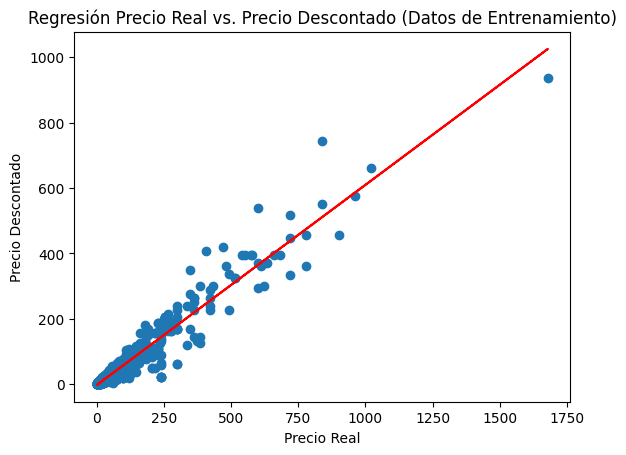

In [8]:
# Utilizo el comando .scatter() para crear un diagrama de dispersión utilizando los datos de entrenamiento.
# Utilizo el comando .plot() para crear una línea de regresión utilizando los datos de Y predichos en lugar de los datos de Y de entrenamiento.
# Utilizo los comandos xlabel(), ylabel() y title() para añadir etiquetas al diagrama de dispersión.

plt.scatter(X_train, Y_train)
plt.plot(X_train, Y_train_predict, color = 'red')
plt.xlabel('Precio Real')
plt.ylabel('Precio Descontado')
plt.title('Regresión Precio Real vs. Precio Descontado (Datos de Entrenamiento)')
plt.show()


**Verificar el ajuste del modelo mediante el cálculo de R2 con datos de prueba.**

Ahora que el modelo se ha creado con los datos de entrenamiento, los datos de prueba se pueden utilizar como entradas para calcular el valor R2. Si el modelo es preciso y no está sobreajustado, los valores R2 de los datos de entrenamiento y prueba deben ser muy similares

In [9]:
Y_test_predict = fitted.predict(X_test)
print('R2 = ', r2_score(Y_test, Y_test_predict))

R2 =  0.918596014939305


**La puntuación R2 de los datos de la prueba es de .919, similar a la puntuación R2** de los datos de entrenamiento. Tanto los datos de entrenamiento como los de prueba produjeron puntuaciones R2 similares, lo que indica que **el modelo no está sobreajustado.**

**Comprobación de la sobreajuste mediante la validación cruzada.**

La validación cruzada es otra forma de comprobar si el R2 es el resultado de un sobreajuste. La validación cruzada es el proceso de dividir el conjunto de datos original en k número de conjuntos iguales. Un conjunto se utiliza para la validación, mientras que los conjuntos restantes se utilizan para crear modelos de regresión lineal. Cada modelo se prueba utilizando el conjunto de datos de validación y se crea un valor R2 para cada modelo. Los valores de R2 se promedian para crear un solo valor de R2

In [10]:
# Utilizo el comando KFold() para determinar en cuántos conjuntos de datos se divide el conjunto de datos original.

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Utilizo el comando cross_val_score() para calcular los puntajes de validación cruzada.

cv_results = cross_val_score(LinearRegression(), X, Y, cv = kfold)

# Utilizo el comando .mean() para obtener el puntaje promedio de validación cruzada.

print('Puntaje R2 de Validación Cruzada = ', cv_results.mean())


Puntaje R2 de Validación Cruzada =  0.9092705537480947


La puntuación R2 a través de la validación cruzada es .909. **La puntuación R2 de la validación cruzada es similar a las puntuaciones R2 tanto de los datos de entrenamiento como de prueba. El modelo no está sobreajustado.**

**Probar las suposiciones del modelo de regresión lineal.**

Al realizar la regresión lineal, se hacen 4 suposiciones con respecto a los datos.

Existe una relación lineal entre las variables independientes (precio real) y dependientes (precio contado).

Las variables independientes no tienen una alta correlación entre sí.

La varianza es constante en todo el modelo.

Los residuos se distribuyen normalmente.

**¿Existe una relación lineal entre las variables independientes y dependientes?**

[Text(0.5, 1.0, 'Actual Price vs. Discounted Price'),
 Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Discounted Price')]

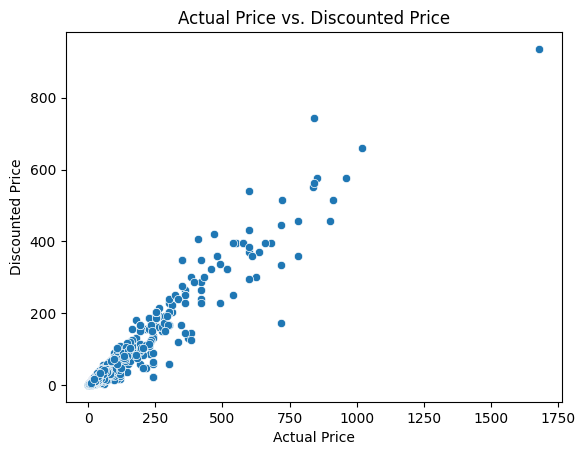

In [11]:
sns.scatterplot(data = amazon_correl,
                x = 'actual_price',
                y = 'discounted_price').set(title = 'Actual Price vs. Discounted Price',
                                            xlabel = 'Actual Price',
                                            ylabel = 'Discounted Price')

El gráfico es un gráfico de dispersión del precio real (variable independiente) y el precio con descuento (variable dependiente). **El gráfico de dispersión muestra una relación lineal entre las dos variables.**

**Comprobación de la multicolinealidad.**

La multicolinealidad es cuando las variables independientes en la regresión lineal tienen una alta correlación entre sí. La multicolinealidad se produce en la regresión lineal donde hay más de 1 variable independiente. En esta regresión lineal, solo hay 1 variable independiente, **por lo que no hay ningún problema con la multicollinealidad.**

**Comprobando si hay heteroscedasticidad.**

Los residuos son la diferencia entre el valor previsto de la variable dependiente (precio con descuento) y el valor real de la variable dependiente. La heteroscedasticidad se produce cuando la varianza de los residuos no es constante como el valor del cambio de la variable dependiente. La heteroescasticidad sugiere que el modelo puede necesitar variables independientes adicionales para predecir mejor la variable dependiente. Al trazar los valores predichos y los residuos en un gráfico de dispersión, un modelo con heteroescasticidad tendrá puntos de datos que se extienden.

In [12]:
# Utilizo el comando ols() para realizar una regresión lineal por mínimos cuadrados ordinarios.

model = ols(formula = 'discounted_price ~ actual_price',
          data = amazon_correl[['discounted_price', 'actual_price']]).fit()

# Creo un dataframe con la variable independiente.

X_OLS = amazon_correl['actual_price']

# Utilizo el comando .predict para predecir los valores de la variable dependiente (precio con descuento).

fitted_values = model.predict(X_OLS)

# Utilizo el comando .resid para calcular la diferencia entre los valores predichos y los valores reales.

residuals = model.resid


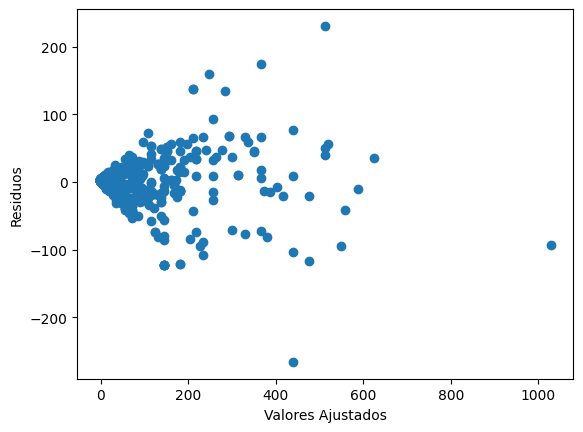

In [13]:
# Utilizo un diagrama de dispersión para graficar los valores ajustados vs. los valores residuales.
# Si los datos tienen heterocedasticidad, los puntos de datos se dispersarán hacia afuera.

plt.scatter(fitted_values, residuals)

plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')

plt.show()


**El modelo tiene heteroscasticidad.** A medida que aumentan los valores ajustados, la diferencia de los puntos también aumenta. Esto indica que **cuando el modelo predice el precio con descuento de un producto, cuanto mayor sea el precio con descuento previsto, más propenso a errores se vuelve el modelo.** La heteroscedasticidad sugiere que se necesitan otras variables para predecir el precio con descuento. Sin embargo, otras variables, como el porcentaje de descuento, la calificación y el recuento de calificaciones, tienen muy poca correlación e impacto en el precio de descuento. Puede haber otros factores no incluidos en el conjunto de datos que puedan influir en los precios de descuento.

**Comprobación de la normalidad residual.**

Los residuos son la diferencia entre el valor predicho de la variable dependiente (precio con descuento) y el valor real de la variable dependiente. La normalidad es la condición de que un conjunto de datos tenga una distribución normal. La violación de la normalidad de los residuos tiene pocas consecuencias en los conjuntos de datos que son lo suficientemente grandes (generalmente, más de 200 puntos de datos).Sin embargo, la normalidad de los residuos tendrá un efecto al calcular otros valores estadísticos, como el error estándar o los valores P

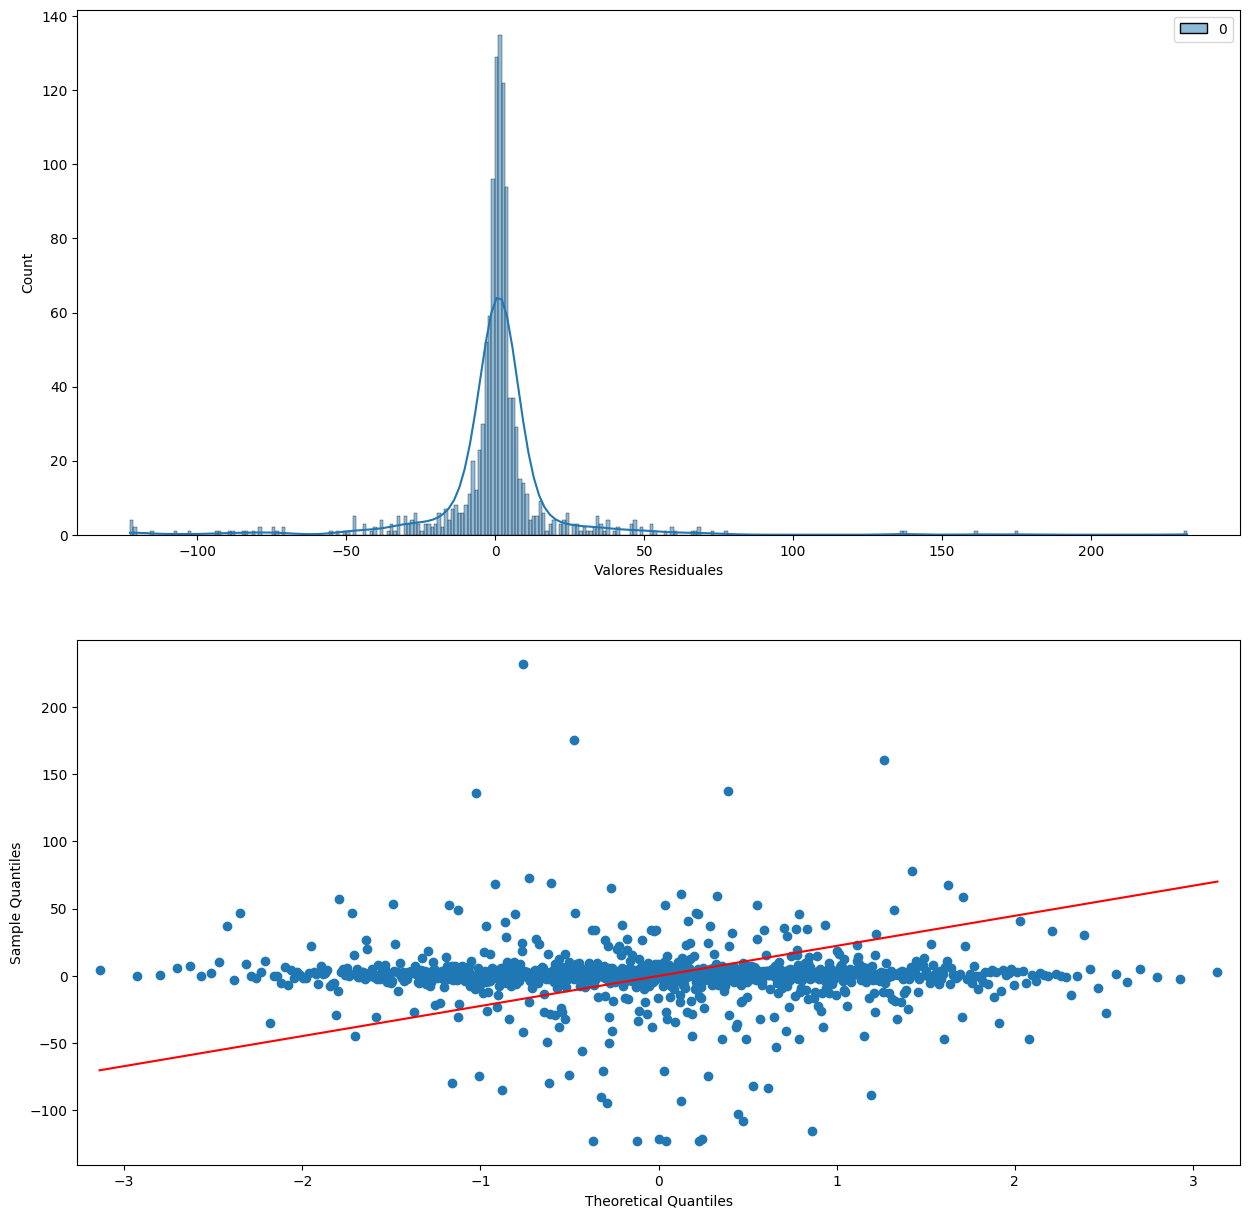

In [14]:
# Utilizo un histograma para determinar si los residuos tienen una distribución normal.

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

sns.histplot(residuos,
             kde = True,
             ax = ax[0]).set_xlabel('Valores Residuales')

import statsmodels.api as sm

sm.qqplot(residuos,
          line = 's',
          ax = ax[1])

plt.show()


**Los gráficos muestran que los residuos no tienen una distribución normal.** Para que los residuos tengan una distribución normal, los puntos de datos en el gráfico QQ deben seguir la línea de cerca.

**En este análisis, evaluaremos la presencia de heteroscedasticidad en nuestro modelo de regresión lineal** que predice discounted_price basado en actual_price.

- ajustaremos un modelo de regresión lineal simple.

- Realizaremos la prueba de Breusch-Pagan para detectar la heteroscedasticidad en el modelo.

- Generaremos varios gráficos para visualizar los residuos y evaluar la presencia de heteroscedasticidad.

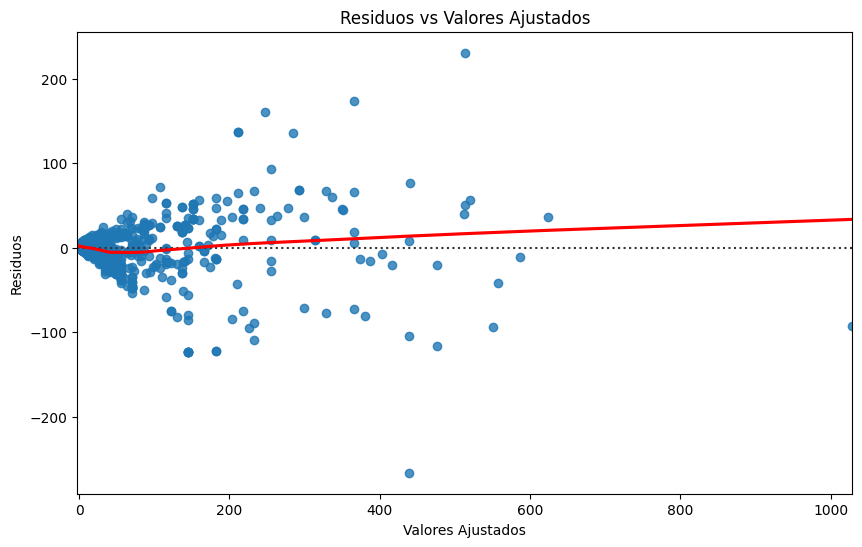

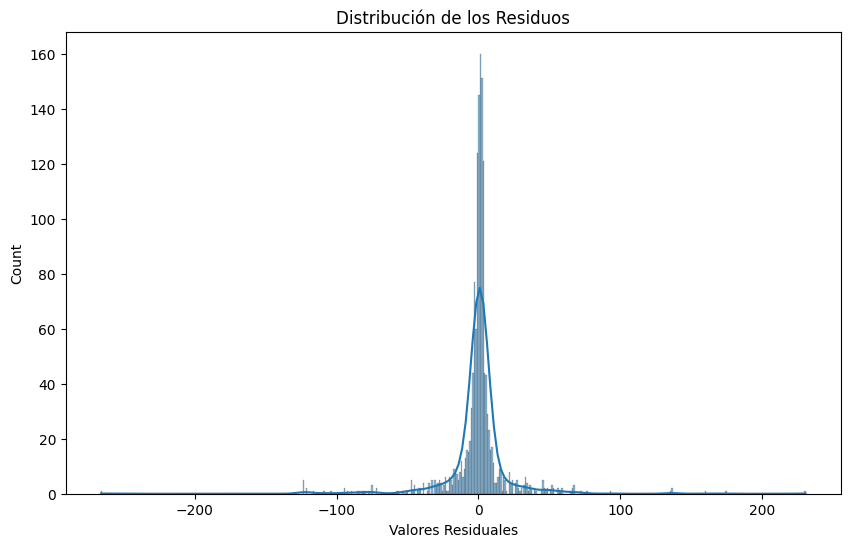

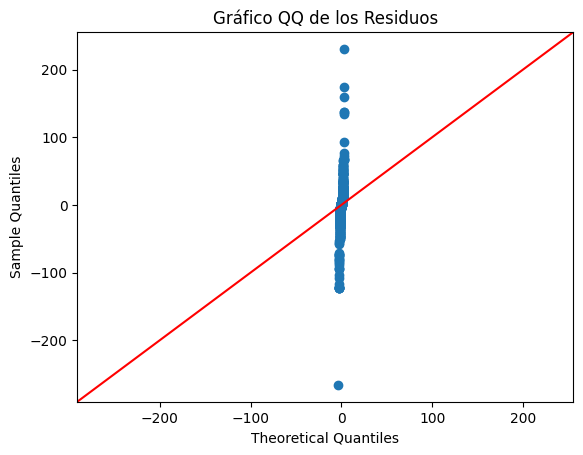

{'LM Stat': 325.43944721450475,
 'LM Test p-value': 9.464605537382303e-73,
 'F-Stat': 417.8083473590036,
 'F-Test p-value': 6.887893162218596e-82}

In [15]:
# Ajustar el modelo de regresión
model = ols('discounted_price ~ actual_price', data=amazon_correl).fit()

# Realizar la prueba de Breusch-Pagan
test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Stat', 'LM Test p-value', 'F-Stat', 'F-Test p-value']
breusch_pagan_results = dict(zip(labels, test))

# Graficar los residuos
residuals = model.resid
fitted = model.fittedvalues

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Valores Residuales')
plt.title('Distribución de los Residuos')
plt.show()

# Gráfico QQ de residuos
sm.qqplot(residuals, line ='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Mostrar los resultados de la prueba de Breusch-Pagan
breusch_pagan_results


**Residuos vs Valores Ajustados:**

El gráfico muestra una dispersión creciente de residuos a medida que aumentan los valores ajustados.
La línea roja ajustada sugiere una tendencia ascendente, lo cual indica la presencia de heteroscedasticidad, ya que los residuos no tienen una varianza constante.

**Histograma de Residuos:**

El histograma muestra una distribución de residuos con una alta concentración alrededor de cero.
La presencia de colas largas en ambos extremos indica posibles valores atípicos y desviaciones de la normalidad.

**Gráfico QQ de Residuos:**

El gráfico QQ muestra una desviación significativa de los puntos respecto a la línea de referencia, especialmente en los extremos.
Esto sugiere que los residuos no siguen una distribución normal y hay presencia de valores atípicos.
Prueba de Breusch-Pagan:

**Resultados:**

LM Stat: 325.43944721450475

LM Test p-value: 9.464605537382303e-73

F-Stat: 417.8083473590036

F-Test p-value: 6.887893162218596e-82





